# Exploratory Data Analysis Workshop

June 24, 2020  

#### Purpose of Workshop

- improve skills
- share experience
- join the project team

#### About Data Circles ([datacircles.org](https://datacircles.org))

Data Circles (formerly SeaWiDS) exists to provide a place for women in data science to connect, build community, support each other and grow. In less than two years Data Circles, has grown into a community with more than 1,800 members.   

Teams of volunteers organize monthly events in the Greater Seattle area, including: technical talks, informational panels, career development workshops, hackathons, conferences, networking events, book clubs, mentoring, study sessions, and interview prep.  

Likewise, presenters Niwako and Erin are members of the Data Circles Project Circle, and the Projects Circle is organizing the Traffic Collision Analysis project described below.  

Niwako got her Ph.D. at the University of Illinois at Urbana Champaign. She was also a professor of psychology at the University of Wisconsin at LaCrosse before moving to Seattle. She taught research methods and statistics to undergraduate students for many semesters while in grad school. Her research has focused on how social relationships and mental health are linked to each other in everyday life. Because of the nature of her research, she has done a lot of longitudinal and multivariate analyses.  

Erin studied economics at Whitman College and earned her M.S. in Data Science from the University of Washington in 2018. She has worked in the field of computational law and analyzed demographic data like in this study of [gentrification](https://public.tableau.com/profile/erin.orbits#!/vizhome/SeattleGentrificationAtlas/Atlas). She is a longtime Seattle resident, and currently spends much of her time chasing a crazy kitten named Oliver.  

The workshop materials can be found in the Data Circles [GitHub repository](https://github.com/datacircles).    

## 1. Introduction to the project

Traffic collisions continue to be a serious problem. According to the [annual collision report for 2015](https://www.wsdot.wa.gov/mapsdata/crash/pdf/2015_Annual_Collision_Summary.pdf) released by the Washington State Dept. of Transportation (WSDOT), there were 117,053 collisions and approximately 59.7 billion miles driven. In 2015, there were  

* 5,576,586 Licensed drivers  
* 6,252,554 Registered vehicles  
* 416,699 Speeding citations  
* 33,697 Cell phone and texting citations   

In that same year:  

* Fridays had the most collisions;   
* December had the most crashes (on average, 401 per day); and  
* Driver inattention or distraction was the most frequent contributing factor  

**These bullet points above make me wonder if we should be using a dataset for the state of Washington instead of the city of Seattle for our project. The last bullet point is compelling (= makes me think inattention may be a predictor of accidents) but in our dataset, there's so much missing data for the column 'INATTENTIONIND'.**

Our data comes from the Seattle City GIS database, and for more information, see [seattlecitygis](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions).  

This project looks at recent collision data to consider how much things have changed. The primary goal of the project is to identify the most dangerous sections of road in Seattle and suggest improvements.  

_**If you are interested in joining the project, please signup for the Project Kickoff event on [meetup.com](https://www.meetup.com/Seattle-WiDS-Meetup/events/ncnksrybckblb/).**_    

## 2. Purpose of exploratory data analysis (EDA)

EDA is a process for learning about datasets; looking for patterns, characteristics, or points of interest; answering questions; and visualizing the results. This requires the analyst:  
- to clean, reformat, and validate data;
- to visualize distributions and relationships between variables; and 
- to use regression models to predict and explain.  

Data exploration typically uses both manual data analysis and automated tools that extract data into initial reports that include data visualizations.  

Although EDA is the first step in the data analysis process, it should be repeated if additional data is added. Summarizing the size, accuracy and initial patterns in the data provides insight into potential trends and identifies areas for further analysis or data refinement. The end result provides a more useful view of the data to guide further analysis.  

### Project Specific Goals

__To Do -- Analyzing Seattle Traffic Collision Data??__.  

The Project Circle has the following goals

1. Identify dangerous locations 
1. Identify predictors of accidents (e.g., physical characteristics of the location, road condition, DUI, weather)
1. Examine increase or decrease in number of accidents over time
1. Identify predictors of increase or decrease in the number of accidents
1. Recommend improvements on dangerous locations

- However, as you explore the dataset, other questions are likely to pop up in your head. 
- We recommend making a note of those questions as they may guide you through your project. 
- You are welcome to answer any questions you are interested in using this dataset.

## 3. Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore") 

from datetime import datetime
from IPython.display import display, Markdown

In [2]:
# Run this cell to display all output within each cell, 
# instead of just the last statement

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 4. Read the data into a dataframe

It's always a good idea to keep a copy of the original data. So, we suggest saving the original collision data in a CSV file and a second CSV file with the manipulated data. 

For more information about the Pandas `read_csv` method, see the [read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). There are many useful parameters that can be specified, e.g. data types, column names, null values, and etc.   

In [3]:
# To read a CSV file from the web

url = "https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
rdf = pd.read_csv(url, parse_dates=["INCDTTM"])

---------------------
### OPTIONAL -- save the CSV file 

It's good practice to save a copy of the original data, but it is not necessary for this workshop. If you want to write a copy of the df to your hard drive, follow run the cells below:

In [4]:
# To see where the CSV file will be saved, run the
# print working directory (pwd) shell command:

! pwd

/Users/niwako/GDrive/Kyōyū/garbanzo


In [5]:
df = rdf.copy()

In [6]:
# To save the CSV file data locally in your working directory:

def save_csv_file(df, raw=True):
    
    from datetime import datetime
    
    now = datetime.now()
    
    if raw is True:
        file_name = "collision_data_{}{}{}_raw.csv".format(now.month, now.day, now.year)
    else:
        file_name = "collision_data_{}{}{}_mod.csv".format(now.month, now.day, now.year)
        
    df.to_csv(file_name, encoding="utf-8", index=False) 
    
    print("{file} saved".format(file=file_name))

    
save_csv_file(rdf, True)

collision_data_6172020_raw.csv saved


In [7]:
# the ls command shows a list of all files in the current folder (aka directory)
# the collision_data CSV file should be in the list
! ls

Assessment-2019-07-23.ipynb    collision_data_6172020_raw.csv
Workshop on EDA.ipynb          crime_stats
collision_data_6162020_raw.csv temperament.ipynb


------------

**I changed the file name in the cell below so I wouldn't get an error**

In [8]:
# To read a locally saved CSV file

local_file_name = "collision_data_6162020_raw.csv"  # or whatever your file name is
rdf = pd.read_csv(local_file_name, parse_dates=["INCDTTM"])
print("done")

done


In [9]:
df = rdf.copy()

## 5. Look at the overall picture of the dataframe

In [10]:
df.shape

(219938, 40)

In [11]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### About the original columns


__-- TO DO: MAKE SURE ALL COLUMNS ARE LISTED__  
 
OBJECTID - ESRI unique identifier  
INCKEY - a unique key for the incident, type Long  
COLDETKEY - a secondary key for the incident, type Long  
ADDRTYPE - text, 12 VARCHAR, Collision address type:  
$\,\,$ • Alley  
$\,\,$ • Block  
$\,\,$ • Intersection   
INTKEY - a key that corresponds to the intersection associated with a collision, type Double  
SEVERITYCODE - a code that corresponds to the severity of the collision:  
$\,\,$ • 3 — fatality  
$\,\,$ • 2b — serious injury  
$\,\,$ • 2 — injury  
$\,\,$ • 1 — prop damage  
$\,\,$ • 0 — unknown  
INCDATE - incident date   
INCDTTM - date and time of the incident, type Text, 30 VARCHAR  
JUNCTIONTYPE - category of the junction where the collision took place  
SDOT_COLCODE - the SDOT collision code    
SDOT_COLDESC - a description of the collision corresponding to the collision code  
INATTENTIONIND - whether or not collision was due to inattention. (Y/N)  
PEDROWNOTGRNT - whether or not the pedestrian right of way was not granted. (Y/N)  
ST_COLCODE - code provided by the state that describes the collision, for example: 
$\,\,$ 0 - Vehicle Going Straight Hits Pedestrian  
$\,\,$ 1 - Vehicle Turning Right Hits Pedestrian  
$\,\,$ 2 - Vehicle Turning Left Hits Pedestrian  
$\,\,$ 3 - Vehicle Backing Hits Pedestrian  
$\,\,$ 4 - Vehicle Hits Pedestrian - All Other Actions  
$\,\,$ 5 - Vehicle Hits Pedestrian - Actions Not Stated  
$\,\,$ 10 - Entering At Angle   
$\,\,$ 11 - From Same Direction - Both Going Straight - Both Moving - Sideswipe  
$\,\,$ 12 - From Same Direction - Both Going Straight - One Stopped - Sideswipe  
$\,\,$ 13 - From Same Direction - Both Going Straight - Both Moving - Rear End  
$\,\,$ ...  
ST_COLDESC - a description that corresponds to the state’s coding designation    
SEGLANEKEY - a key for the lane segment in which the collision occurred  
CROSSWALKKEY - a key for the crosswalk at which the collision occurred  

In [12]:
# Consider how many missing and unique values there are in each column

col_na = round(100*(df.isna().sum()/len(df)), 2)
col_nunique = df.nunique()    
df_summary = pd.DataFrame({"data_type": df.dtypes,
                           "percent_missing_values": col_na,
                           "total_unique_values": col_nunique}).sort_values(by=["percent_missing_values"],
                                                                            ascending=False)
df_summary.head(25)

,data_type,percent_missing_values,total_unique_values
PEDROWNOTGRNT,object,97.65,1
SPEEDING,object,95.53,1
EXCEPTRSNDESC,object,94.66,1
INATTENTIONIND,object,86.28,1
INTKEY,float64,67.57,7890
EXCEPTRSNCODE,object,54.74,2
SDOTCOLNUM,float64,42.16,127186
LIGHTCOND,object,12.04,9
WEATHER,object,12.00,11
ROADCOND,object,11.97,9


## 6. Understand the dataframe in relation to the questions at hand

## a. Numeric variables

These variables provide information about what each accident looked like. 

- PERSONCOUNT (# of people invovled)
- PEDCOUNT (# of pedestirans)
- PEDCYLCOUNT (# of cyclists)
- VEHCOUNT (# of vehicles)
- INJURIES (# of injuries)
- SERIOUSINJURIES (# of serious injuries)
- FATALITIES (# of deaths)

## b. Non-numeric columns of interest

These string and categorical variables provide information about the situation or environment in which each accident occurred and could be used as predictors of accidents.   

### External (i.e., not dependent on the characteristics of the collision site) factors
- LIGHTCOND (light condition)   
- WEATHER (description of the weather conditions during the time of the collision)   

### Human factors
- INATTENTIONIND (whether or not collision was due to inattention)
- UNDERINFL (whether or not a driver involved was under the influence)
- PEDROWNOTGRNT(Whether pedestrian had the right of way)
- SPEEDING (whether or not speeding was a factor in the collision)

### Characteristics of the site
- ADDRTYPE (address type)
- LOCATION (described in street names)
- JUNCTIONTYPE (junction type)
- ROADCOND (road condition)


## 7. Cleaning at the dataframe level

It can be helpful to evaluate the dataframe as a whole and do dataframe level cleaning and formatting before drilling down into the individual variables. This includes tasks like renaming columns, removing duplicate rows, changing column datatypes, or dropping any clearly unnecessary columns (especially if memory is an issue).  

Depending on the complexity of your dataset and how familiar you are with the the domain knowledge, some of these tasks will need to be completed after you work with the individual variables, _i.e._ at the column level.  

This might also be a good point to merge multiple dataframes if you're working with multiple datasets.  

## a. Consider renaming columns

If you want to use new naming conventions for variables, it is better to make the change earlier. For example, it often makes sense to change all the column names to lowercase or add underscores between words. 

In [13]:
# Example -- how to make all column names lowercase

df.columns = map(str.lower, df.columns)
df.head(2)

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar
0,-122.343357,47.637620,1,329102,330602,EA15165,Unmatched,Intersection,28016.0,DEXTER AVE N AND DEXTER WAY N,,NaN,2,Injury Collision,NaN,2,0,0,0,1,0,0,2020/02/15 00:00:00+00,2020-02-15 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
1,-122.297947,47.708409,2,96200,96200,C717112,Matched,Intersection,36667.0,28TH AVE NE AND NE 110TH ST,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2009/01/16 00:00:00+00,2009-01-16 15:02:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Daylight,NaN,9016040.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N


## b. Consider dropping columns

It is a bit risky to drop columns at this point, but if there are columns that are clearly unhelpful or missing a huge amount of data, then dropping those columns is reasonable.  

### Would you drop any of the columns with missing data? Why or why not?
  
How much missing data is too much? What is the right threshold?   

Let's look at the columns missing the most data. 

In [14]:
# Columns missing the most data

display(df_summary[df_summary["percent_missing_values"] > 80])

,data_type,percent_missing_values,total_unique_values
PEDROWNOTGRNT,object,97.65,1
SPEEDING,object,95.53,1
EXCEPTRSNDESC,object,94.66,1
INATTENTIONIND,object,86.28,1


### Would you drop any unnecessary columns?

For example, `objectid` is essentially an index column, so you could drop it. But this might make things difficult later if you want to merge on `objectid`.  

In [15]:
# 
df.drop(columns=["objectid"], inplace=False).head(3)

,x,y,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar
0,-122.343357,47.637620,329102,330602,EA15165,Unmatched,Intersection,28016.0,DEXTER AVE N AND DEXTER WAY N,,NaN,2,Injury Collision,NaN,2,0,0,0,1,0,0,2020/02/15 00:00:00+00,2020-02-15 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
1,-122.297947,47.708409,96200,96200,C717112,Matched,Intersection,36667.0,28TH AVE NE AND NE 110TH ST,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2009/01/16 00:00:00+00,2009-01-16 15:02:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Daylight,NaN,9016040.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,NaN,NaN,48500,48500,2070628,Matched,Block,NaN,SPRUCE ST BETWEEN 8TH AVE AND TERRY AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2006/02/27 00:00:00+00,2006-02-27 16:30:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Unknown,Unknown,Daylight,NaN,6058018.0,NaN,32,One parked--one moving,0,0,N


## c. Consider dropping duplicate or unnecessary rows 

It turns out that no row in this dataset has complete data. So, we would lose the entire dataframe if we dropped any row with missing values. We could take a closer look and decide to drop rows depending on which columns they are missing values in (e.g., even if `X` and `Y` are missing, as long as the `LOCATION` column is not missing, we still know where the accident happened, so it's okay to keep a row that are missing `X` and `Y`). Feel free to try different combinations.  

```
dup_col_lst = []

# make all string column values lowercase for uniform comparison
str_cols = list(df.select_dtypes(include="object").columns)
for col in str_cols:
    df[col] = df[col].str.lower()
# print("str_cols: {}\n\n".format(str_cols))

for col in df.columns:
    # if the total number of unique values = total number of rows in df
    if df[col].nunique() == df.shape[0]:
        print("column {} has no duplicate rows".format(col))
    else:
        dup_col_lst.append(col)
        
print("\n {} columns have duplicate values:\n{}".format(len(dup_col_lst), dup_col_lst))
```  

Here, we concentrate on dropping rows based on the distribution of the column data. For example, it might make sense to drop all the 2003 data because there are very few data values from 2003. Keeping the 2003 data may skew the distribution and make our plots less useful.  

In [16]:
# looking at incidents over time to see the annual distribution of the data

df["incdate"] = df["incdate"].astype("datetime64")
df["year"] = pd.DatetimeIndex(df.incdate).year  # alternate method
df["month"] = df["incdate"].map(lambda x: x.strftime('%m'))

df_yr = round(100*(df[["year",
                       "objectid"]].groupby(by=["year"]).count()/len(df)), 3)
df_yr = df_yr.rename(columns={"objectid": "percent_of_all_data"})
df_yr

,percent_of_all_data
year,
2003,0.000
2004,7.028
2005,7.282
2006,7.181
2007,6.857
2008,6.429
2009,6.036
2010,5.437
2011,5.645


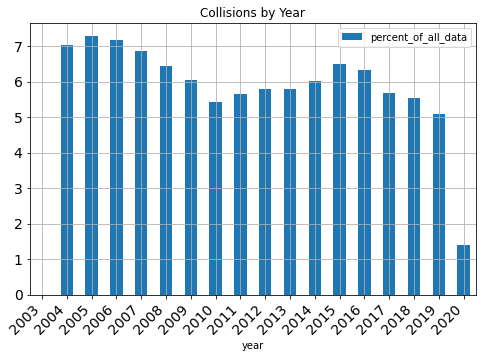

In [17]:
# bar chart of collisions per year
df_yr.plot(kind='bar', figsize=(8, 5));
plt.title("Collisions by Year");
plt.xticks(rotation=45, ha='right', size=14);
plt.yticks(size=14);
plt.grid(True);
plt.show();

Based on the above plot, there's good reason to remove the data from both 2003 and 2020. However, we're only going to remove the 2003 data at this point:

In [18]:
# remove 2003 data
df = df[df["year"] != 2003]
print("df shape with year and month columns, but without the 2003 data: {}".format(df.shape))

df shape with year and month columns, but without the 2003 data: (219937, 42)


## d. Consider changing variable data types

Think about how you plan to use the variable before you change its data type. Pandas data types include: "bool", "float64", "int", "object", "category", and etc. Because we did not assign variable types to columns, all our columns   

In Pandas, `categorical variables` require less memory, so (if appropriate) it can be very useful to change numeric or string (aka `object`) variables to categorical variables. However, there are additional considerations. For example, a column with null (`NaN`) values cannot be converted into a categorical variable. Also, categorical variables cannot be summed like numerical variables, so running univariate statistics on categorical variables requires an additional step.   

__TO DO: THINK ABOUT SHOWING AN EXAMPLE OF DTYPE LIMITATIONS__  

In [19]:
# Example - one way to filter the original variable data types

df.select_dtypes(exclude=["int"]).head(3)

,x,y,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,hitparkedcar,month
0,-122.343357,47.637620,EA15165,Unmatched,Intersection,28016.0,DEXTER AVE N AND DEXTER WAY N,,NaN,2,Injury Collision,NaN,2020-02-15,2020-02-15 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,N,02
1,-122.297947,47.708409,C717112,Matched,Intersection,36667.0,28TH AVE NE AND NE 110TH ST,NaN,NaN,2,Injury Collision,Pedestrian,2009-01-16,2009-01-16 15:02:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Daylight,NaN,9016040.0,NaN,0,Vehicle going straight hits pedestrian,N,01
2,NaN,NaN,2070628,Matched,Block,NaN,SPRUCE ST BETWEEN 8TH AVE AND TERRY AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2006-02-27,2006-02-27 16:30:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Unknown,Unknown,Daylight,NaN,6058018.0,NaN,32,One parked--one moving,N,02


In [20]:
# Example - to check to see if the column is really a float or should be an int
pd.Series(df["sdotcolnum"].unique()).sort_values(ascending=True)[0:30]

90068    1007024.0
1979     3021048.0
196      3137016.0
378      3239035.0
9286     4001001.0
8178     4001002.0
9133     4001003.0
1999     4001004.0
2073     4001005.0
11172    4001006.0
15523    4001007.0
8885     4001008.0
11586    4001009.0
6295     4001010.0
9506     4001011.0
4873     4001012.0
13817    4001013.0
3639     4001014.0
10503    4001015.0
7734     4001016.0
15676    4001017.0
3721     4001018.0
10595    4001019.0
2519     4001020.0
1932     4001021.0
16721    4001022.0
8933     4001023.0
7282     4001024.0
16198    4001025.0
8383     4001026.0
dtype: float64

In [21]:
# example - one way to clean up column data types

######## add variables ##########

dtypes_orig = df.dtypes

df_ = df.copy() 

for col in df_.columns:
    if col.lower() in ["status", "addrtype", "severitycode"]:
        # change to categorical data type
        df_.fillna({col: "none"}, inplace=True)
        df_[col] = pd.Series([str(word).lower() for word in df[col]])
        df_[col] = df[col].astype("category")
    elif col.lower() in ["sdot_colcode", "sdotcolnum"]:
        df_[col] = df[col].fillna(0).astype(int)
    elif col.lower() in ["x", "y"]:
        df_[col] = df[col].astype("float")
    elif col.lower() in ["incdttm"]:
        df_[col] = pd.to_datetime(arg=df[col])
    else:
        continue
        
dtypes_new = df_.dtypes
display(pd.DataFrame({"original_data_type": dtypes_orig,
                      "new_data_type": dtypes_new}))

,original_data_type,new_data_type
x,float64,float64
y,float64,float64
objectid,int64,int64
inckey,int64,int64
coldetkey,int64,int64
reportno,object,object
status,object,category
addrtype,object,category
intkey,float64,float64
location,object,object


## 8. Understand individual columns

In this section, we will examine some of the columns by answering questions that align with the three of the goals mentioned above.

- Goal 1: Identify dangerous locations
- Goal 2: Identify predictors of accidents 
- Goal 3: examine increase or decrease in number of accidents over time

## Goal 1: Which locations are dangerous?

### Q1. How do we decide that a location is dangerous?

We could define dangerousness by:
- Severity of accidents
- Number of accidents

Let's take a look at the outcome columns to understand what these accidents look like.

In [22]:
num_columns = [
    'personcount',
    'pedcount',
    'pedcylcount',
    'vehcount',
    'injuries',
    'seriousinjuries',
    'fatalities']

In [23]:
np.round(df[num_columns].describe(), 3)

,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities
count,219937.000,219937.000,219937.000,219937.00,219937.000,219937.000,219937.000
mean,2.227,0.038,0.027,1.73,0.374,0.015,0.002
std,1.472,0.202,0.164,0.83,0.732,0.158,0.045
min,0.000,0.000,0.000,0.00,0.000,0.000,0.000
25%,2.000,0.000,0.000,2.00,0.000,0.000,0.000
50%,2.000,0.000,0.000,2.00,0.000,0.000,0.000
75%,3.000,0.000,0.000,2.00,1.000,0.000,0.000
max,93.000,6.000,2.000,15.00,78.000,41.000,5.000


- There is no missing values for these columns
- There isn't a lot of variability in the values for these columns
- There seem to be some outliers (e.g., `personcount`, `injuries`)

Let's take a look at these columns with some visualization.

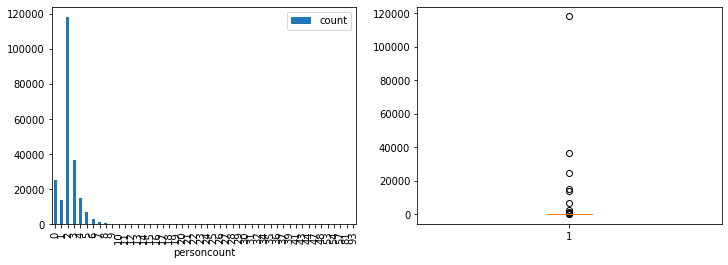

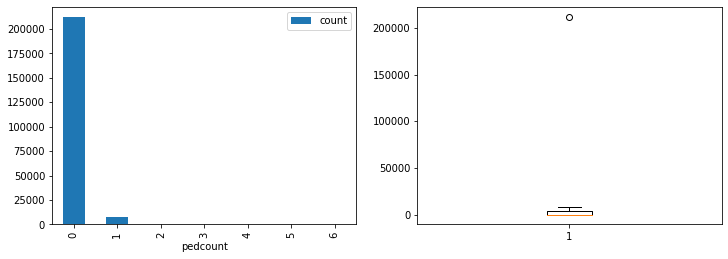

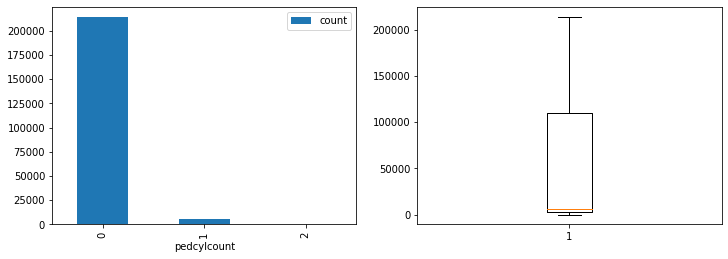

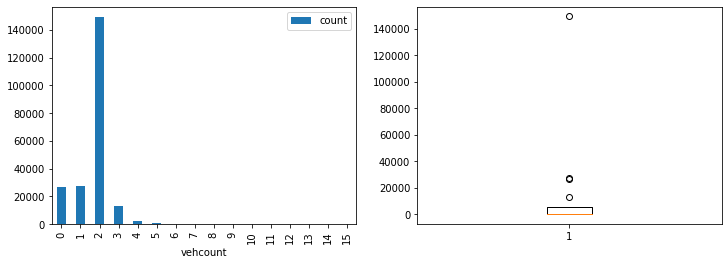

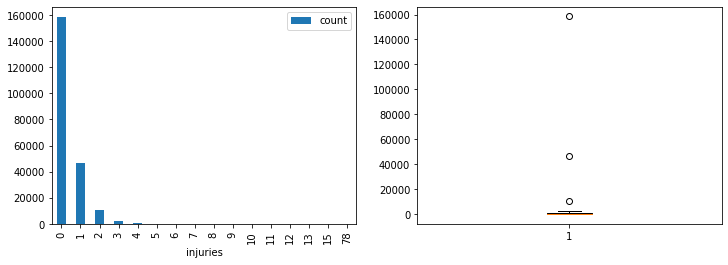

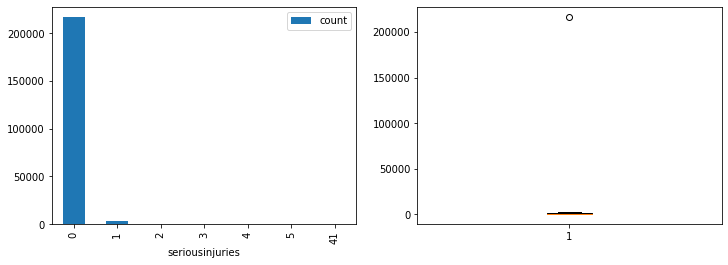

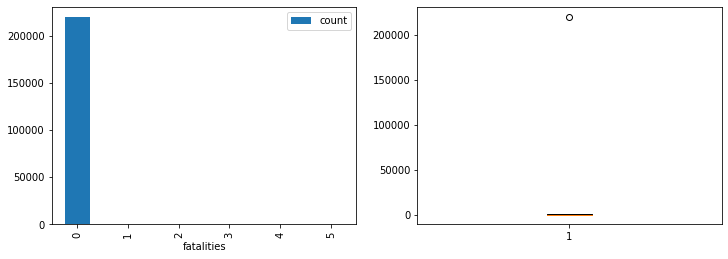

In [24]:
for column in num_columns:
    fig = plt.figure(figsize=(12, 4));
    left = fig.add_subplot(1, 2, 1);
    right = fig.add_subplot(1, 2, 2);

    tempdf = df.groupby(df[column]).size().to_frame('count')
    _ = tempdf.plot.bar(ax=left);
    _ = right.boxplot(tempdf['count']);
    fig.show();

It seems that the most common accidents involve:

- 2 people and 2 vehicles
- 0 pedestrians or cyclists
- 0 to 1 injuries
- 0 deaths

### Side note: What to do with outliers?

- It's important to think if it makes sense to handle outliers or keep them as they are.
- Look at the distribution (e.g., is it normal?) for each column and think whether or not you will be using the column for later analyses (e.g., is there enough variability to explain by other columns?).
- You could consider transforming the data (e.g., log transformation).
- You could replace outliers with the mean or median of the column.  

#### How do you deal with outliers in your data analysis? 

Going back to Q1. how to define dangerousness:

- It might be difficult to use `pedcount`, `pedcylcount`, `seriousinjuries`, and `fatalities` as measures of dangerous locations due to the lack of variability in these columns.
- Let's try using the number of accidents as a way to measure a location's dangerousness

### Q2. Which locations have had the highest total number of accidents?

In [25]:
locdf = df.groupby('location').size().to_frame('count').reset_index()
locdf.sort_values('count', ascending=False, inplace=True)
locdf = locdf.head(7)
locdf

,location,count
11289,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,298
17573,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,295
11290,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,291
11122,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,280
9586,6TH AVE AND JAMES ST,271
11126,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,269
10820,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,256


- We need to remember that the heavier the traffic is, the more likely there is to be an accident. 
- So these locations may have the highest numers of accidents, but also may have the highest amounts of overall traffic. 

Above, we defined dangerousness by the **total** number of incidents. Let's try looking into the number of **severe** incidents.

### Q3. Which locations have the highest numbers of severe incidents?

First, let's take a look at the categories of `severitycode`.

In [26]:
# Re-labeling serverity so that the categories are self-explanatory
df['severitycode'] = df['severitycode'].map({'0': 'Unknown', '1': 'Prop_damage', '2': 'Injury',
                                             '2b': 'Serious_injury', '3': 'Fatality'})

df.groupby(['severitycode']).size().to_frame('count')

,count
severitycode,
Fatality,348
Injury,58319
Prop_damage,136752
Serious_injury,3066
Unknown,21451


In [27]:
# Select incidents that involved injuries and deaths 
severity = ['Fatality', 'Serious_injury', 'Injury']
sevdf = df[(df['severitycode'].isin(severity))]
# Groupby the dataframe by location to rank locations by the number of severe incidents
sevcdf = sevdf.groupby('location').size().to_frame('count').reset_index()
sevcdf.sort_values('count', ascending=False, inplace=True)
most_sev = sevcdf.head(7)
most_sev

,location,count
5661,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,126
4725,6TH AVE AND JAMES ST,112
10436,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,97
5665,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,96
9313,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,96
5794,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,93
12589,WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON...,82


Let's compare the locations with the highest numbers of **severe** incidents and locations with the highest numbers of **total** incidents.

In [28]:
# These are the locations with highest number of severe incidents

mostsevlocations = list(most_sev['location'])
sorted(mostsevlocations, key=str.lower)

['6TH AVE AND JAMES ST',
 'AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N',
 'RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST',
 'WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP']

In [29]:
# These are the locations with highest total number of incidents
manyaccident_locations = list(locdf['location'])
sorted(manyaccident_locations, key=str.lower)

['6TH AVE AND JAMES ST',
 'ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP',
 'AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N']

- 5 locations appear on both lists
- 2 locations only appear on the list of locations with most severe incidents
- 2 other locations only appear on the list of locations with highest number of incidents
- Looks like there is some overlap between the two lists
- Either the total number of accidents or total number of severe accidents could be an indicator of dangerousness
- Caution: Locations may not be entered in a standardized manner. Using coordinates may be a better way to identify dangerous locations.

## Goal 2: identify predictors of accidents

Now let's try to find what contributes to accidents by looking at: 
- External factors
- Human factors
- Characteristics of the collision site

### External factors

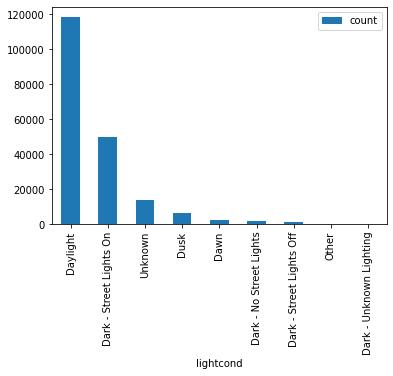

In [30]:
df.groupby('lightcond').size().to_frame('count').sort_values(by=['count'],
                                                             ascending=False).plot.bar();

There are a lot of subcategories for `dark` conditions. Let's try combining them.

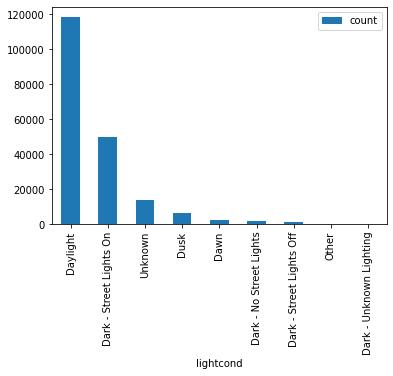

In [31]:
df['lightcond'] = df['lightcond'].replace({
   'dark - no street lights': 'dark',
   'dark - street lights off': 'dark',
   'dark - street lights on': 'dark',
   'dark - unknown lighting': 'dark'})

df.groupby('lightcond').size().to_frame('count').sort_values(by=['count'],
                                                             ascending=False).plot.bar()

**Exercise**
Check the frequencies for `weather`

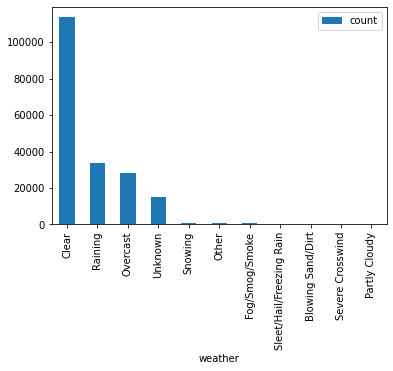

In [32]:
df.groupby('weather').size().to_frame('count').sort_values(by=['count'],
                                                           ascending=False).plot.bar();

**End of exercise**

- Most incidents happened in daylight and a clear weather. 
- Is a bad weather not a predictor of accidents then?

### Human factors

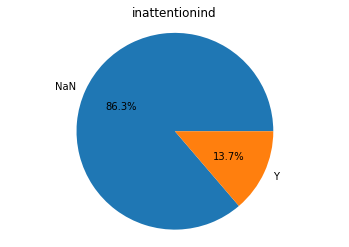

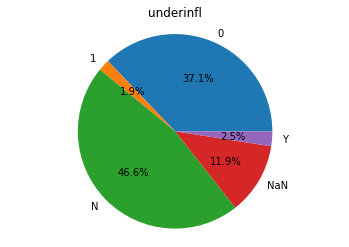

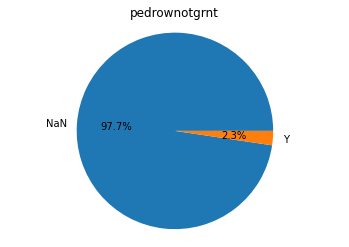

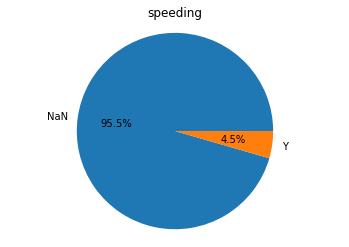

In [33]:
human_factors = ['inattentionind', 'underinfl', 'pedrownotgrnt', 'speeding']
for factor in human_factors:
    tempdf = df.fillna('NaN').groupby(factor).size().to_frame('count').reset_index()
    labels = list(tempdf[factor].values)
    sizes = list(tempdf['count'].values)
    fig1, ax1 = plt.subplots()
    _ = ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
    _ = ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    _ = plt.title(factor)
    plt.show()

- As you can see, there are a lot of missing data in these columns. This is something important to keep in mind when we conduct an analysis later. 
- There are fewer missing values for `underinfl` (whether the driver was under the influence) but there are `0`s and `1`s vs. `n`s and `y`s. If we want to use this column for an analysis later, we should combine these categories, assuming that `0`s = `n`s and `1`s = `y`s.
- Under this assumption, in most cases, drivers were NOT under the influence

### Characteristics of the collision site

**Exercise**
In the cell below, the list `site_characteristics` contains all the columns that describes the characteristics of the collision site. Modeling after the bar graphs we saw for the `External Factors` above, create a bar graph for each column. You are welcome to do so for individual column or using a for loop.

**To do: For the workshop  I will hide the below cell**

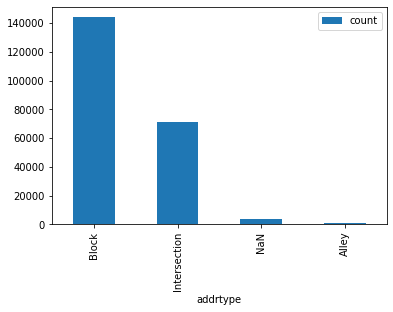

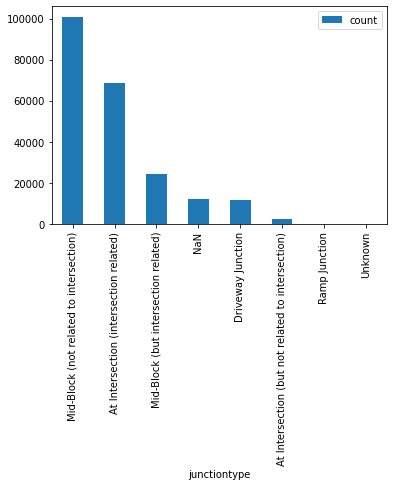

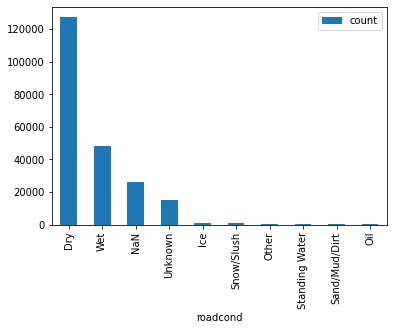

In [34]:
site_characteristics = ['addrtype', 'junctiontype', 'roadcond']

for characteristic in site_characteristics:
    display(df.fillna('NaN').groupby(characteristic).size().to_frame('count').sort_values(by=['count'],
                                                                                          ascending=False).plot.bar())
    

**End of exercise**

More than half of the incidents happened on
- a block rather than an intersection
- a dry road

So far, we found that many incidents happened
- in daylight
- in a clear weather
- on a block
- on a dry road

Given these findings, can we rule out darkness and bad weather as predictors of accidents??

### Q3. Can we predict severity from junction type?

Note: SEVERITYCODE and SEVERITYDESC have the same information

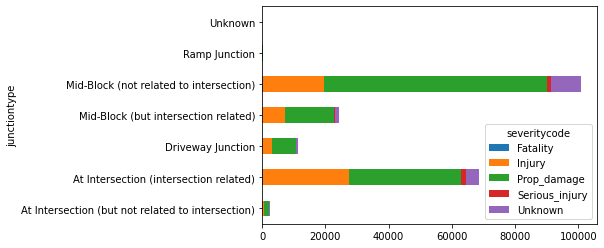

In [35]:
df.pivot_table(index='junctiontype',
               columns='severitycode', aggfunc='size').plot.barh(stacked=True);

## Goal 3: Examine increase or decrease in number of accidents over time

So far, we've looked at the dataset without considering the longitudinal aspect of it. Let's take a look at the change over time in the number of accidents.

### Q4. Has the number of accidents increased or decreased over time?

Let's first take a look at the general trend over time in the overall number of accidents

In [36]:
yeardf = df.groupby('year').year.size().to_frame('count').reset_index()
yeardf["year"] = yeardf["year"].astype(int)
yeardf.head(20)

,year,count
0,2004,15457
1,2005,16016
2,2006,15794
3,2007,15082
4,2008,14139
5,2009,13275
6,2010,11958
7,2011,12416
8,2012,12732
9,2013,12757


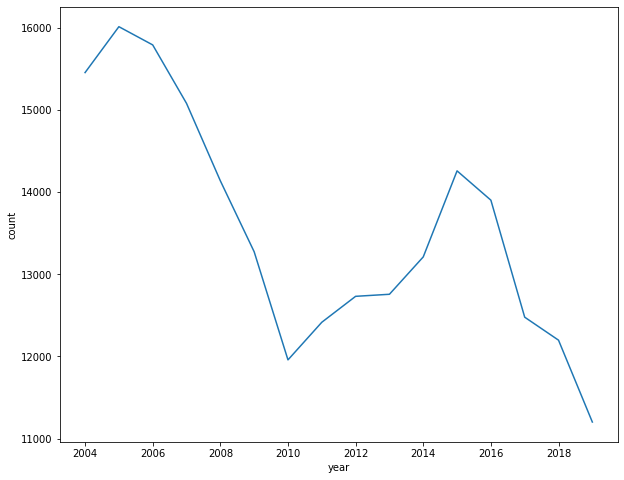

In [37]:
yeardf = yeardf[(yeardf['year'] < 2020)]# Excluding 2020 because the data is incomplete 
fig = plt.figure(figsize=(10, 8));
sns.lineplot(x="year", y="count", data=yeardf);

- It looks like there was a decline from 2004 to 2010, then an increase to 2015, then a decline again toward 2019.
- What might have contributed to these declines and increase in accidents? Change in the volume of traffic? Did the City make changes to the location?

Would we see a similar pattern for the dangerous locations we have identified earlier? Let's take alook. 

### Q5. How has the number of incidents changed over time for the most dangerous locations?

In [38]:
manyaccident_df = df[df['location'].isin(locdf['location'])]
manyaccident_df.head()

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar,year,month
14,-122.344896,47.717173,15,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,NaN,Injury,Injury Collision,Cycles,2,0,1,1,1,0,0,2013-03-14,2013-03-14 17:30:00,Driveway Junction,18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N,2013,03
108,NaN,NaN,109,28100,28100,1778147,Matched,Block,NaN,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,NaN,NaN,Prop_damage,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2004-08-12,2004-08-12 17:30:00,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,4225009.0,NaN,12,From same direction - both going straight - on...,0,0,N,2004,08
455,-122.328079,47.604161,456,27100,27100,04291046,Unmatched,Intersection,29973.0,6TH AVE AND JAMES ST,NaN,NaN,Unknown,Unknown,NaN,0,0,0,0,0,0,0,2004-10-17,2004-10-17 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4291046.0,NaN,NaN,NaN,0,0,N,2004,10
470,NaN,NaN,471,49400,49400,2623108,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,NaN,NaN,Prop_damage,Property Damage Only Collision,Rear Ended,3,0,0,2,0,0,0,2006-10-23,2006-10-23 18:33:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Clear,Dry,Dark - Street Lights On,NaN,6296024.0,NaN,14,From same direction - both going straight - on...,0,0,N,2006,10
481,-122.344896,47.717173,482,18700,18700,1079621,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,NaN,NaN,Prop_damage,Property Damage Only Collision,Other,4,0,0,2,0,0,0,2004-10-04,2004-10-04 00:00:00,Driveway Junction,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,4278029.0,NaN,21,One car entering driveway access,0,0,N,2004,10


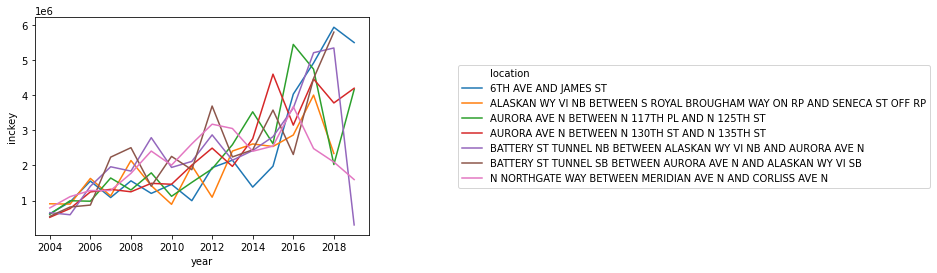

In [39]:
manyaccident_year_data = manyaccident_df.groupby(['location',
                                                  'year'])['inckey'].sum().reset_index()
# Let's exclude 2020 since data are still coming in
manyaccident_year_data = manyaccident_year_data[(manyaccident_year_data['year'] < 2020)]
g = sns.lineplot(x="year", y="inckey", hue="location", data=manyaccident_year_data)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

- In general, there is an upward trend toward 2018
- But a few locations (e.g., blue, purple, and pink) show a decline toward/around 2018
- Green line is going up after 2018
- What might explain these different patterns in different locations?

## 9. Understand relationships between columns


## a. Scatter plots

## b. Bar graphs

## c. Correlations between variables

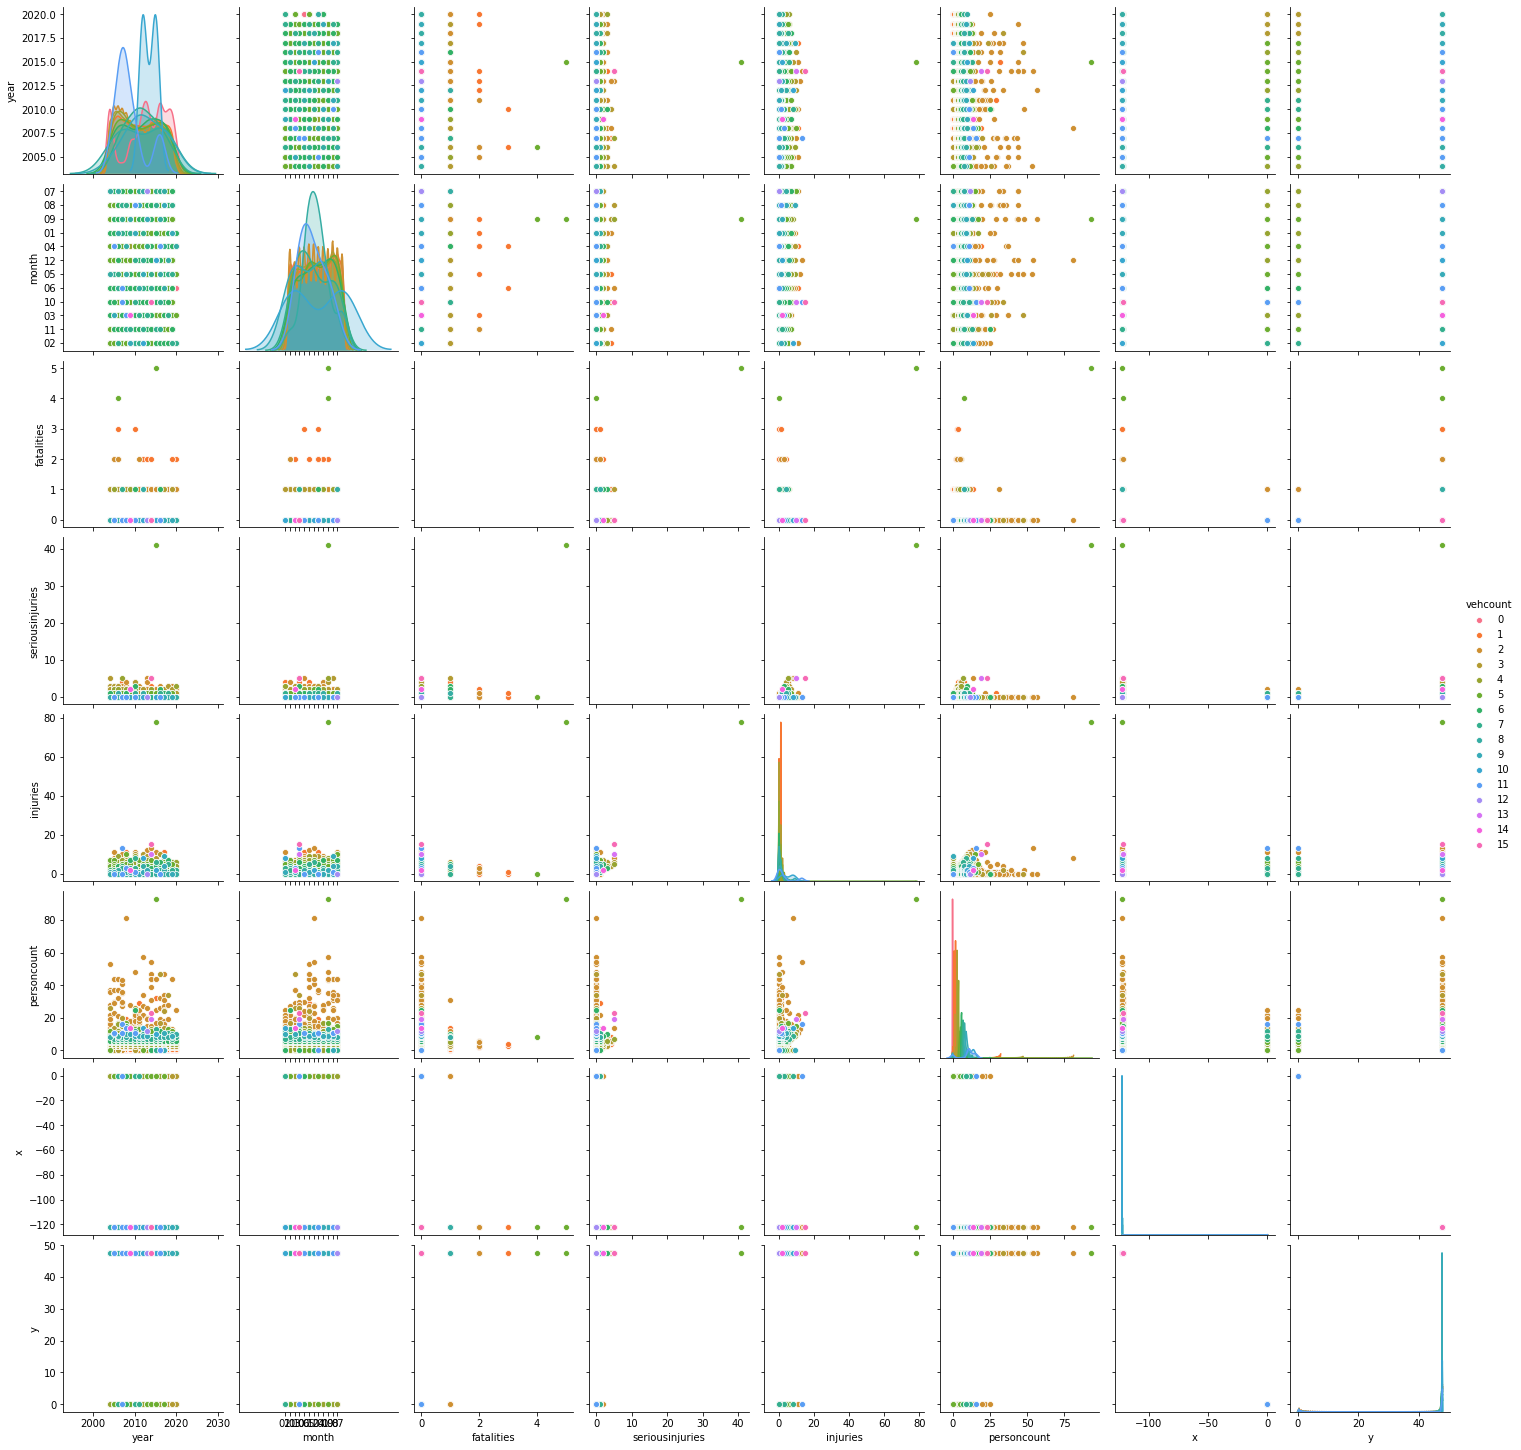

In [40]:
df_ = df[["year", "month", "fatalities", "seriousinjuries", "injuries",
          "personcount", "vehcount", "x", "y"]]
df_.shape

df_ = df_.fillna(0)
sns.pairplot(df_, hue="vehcount");

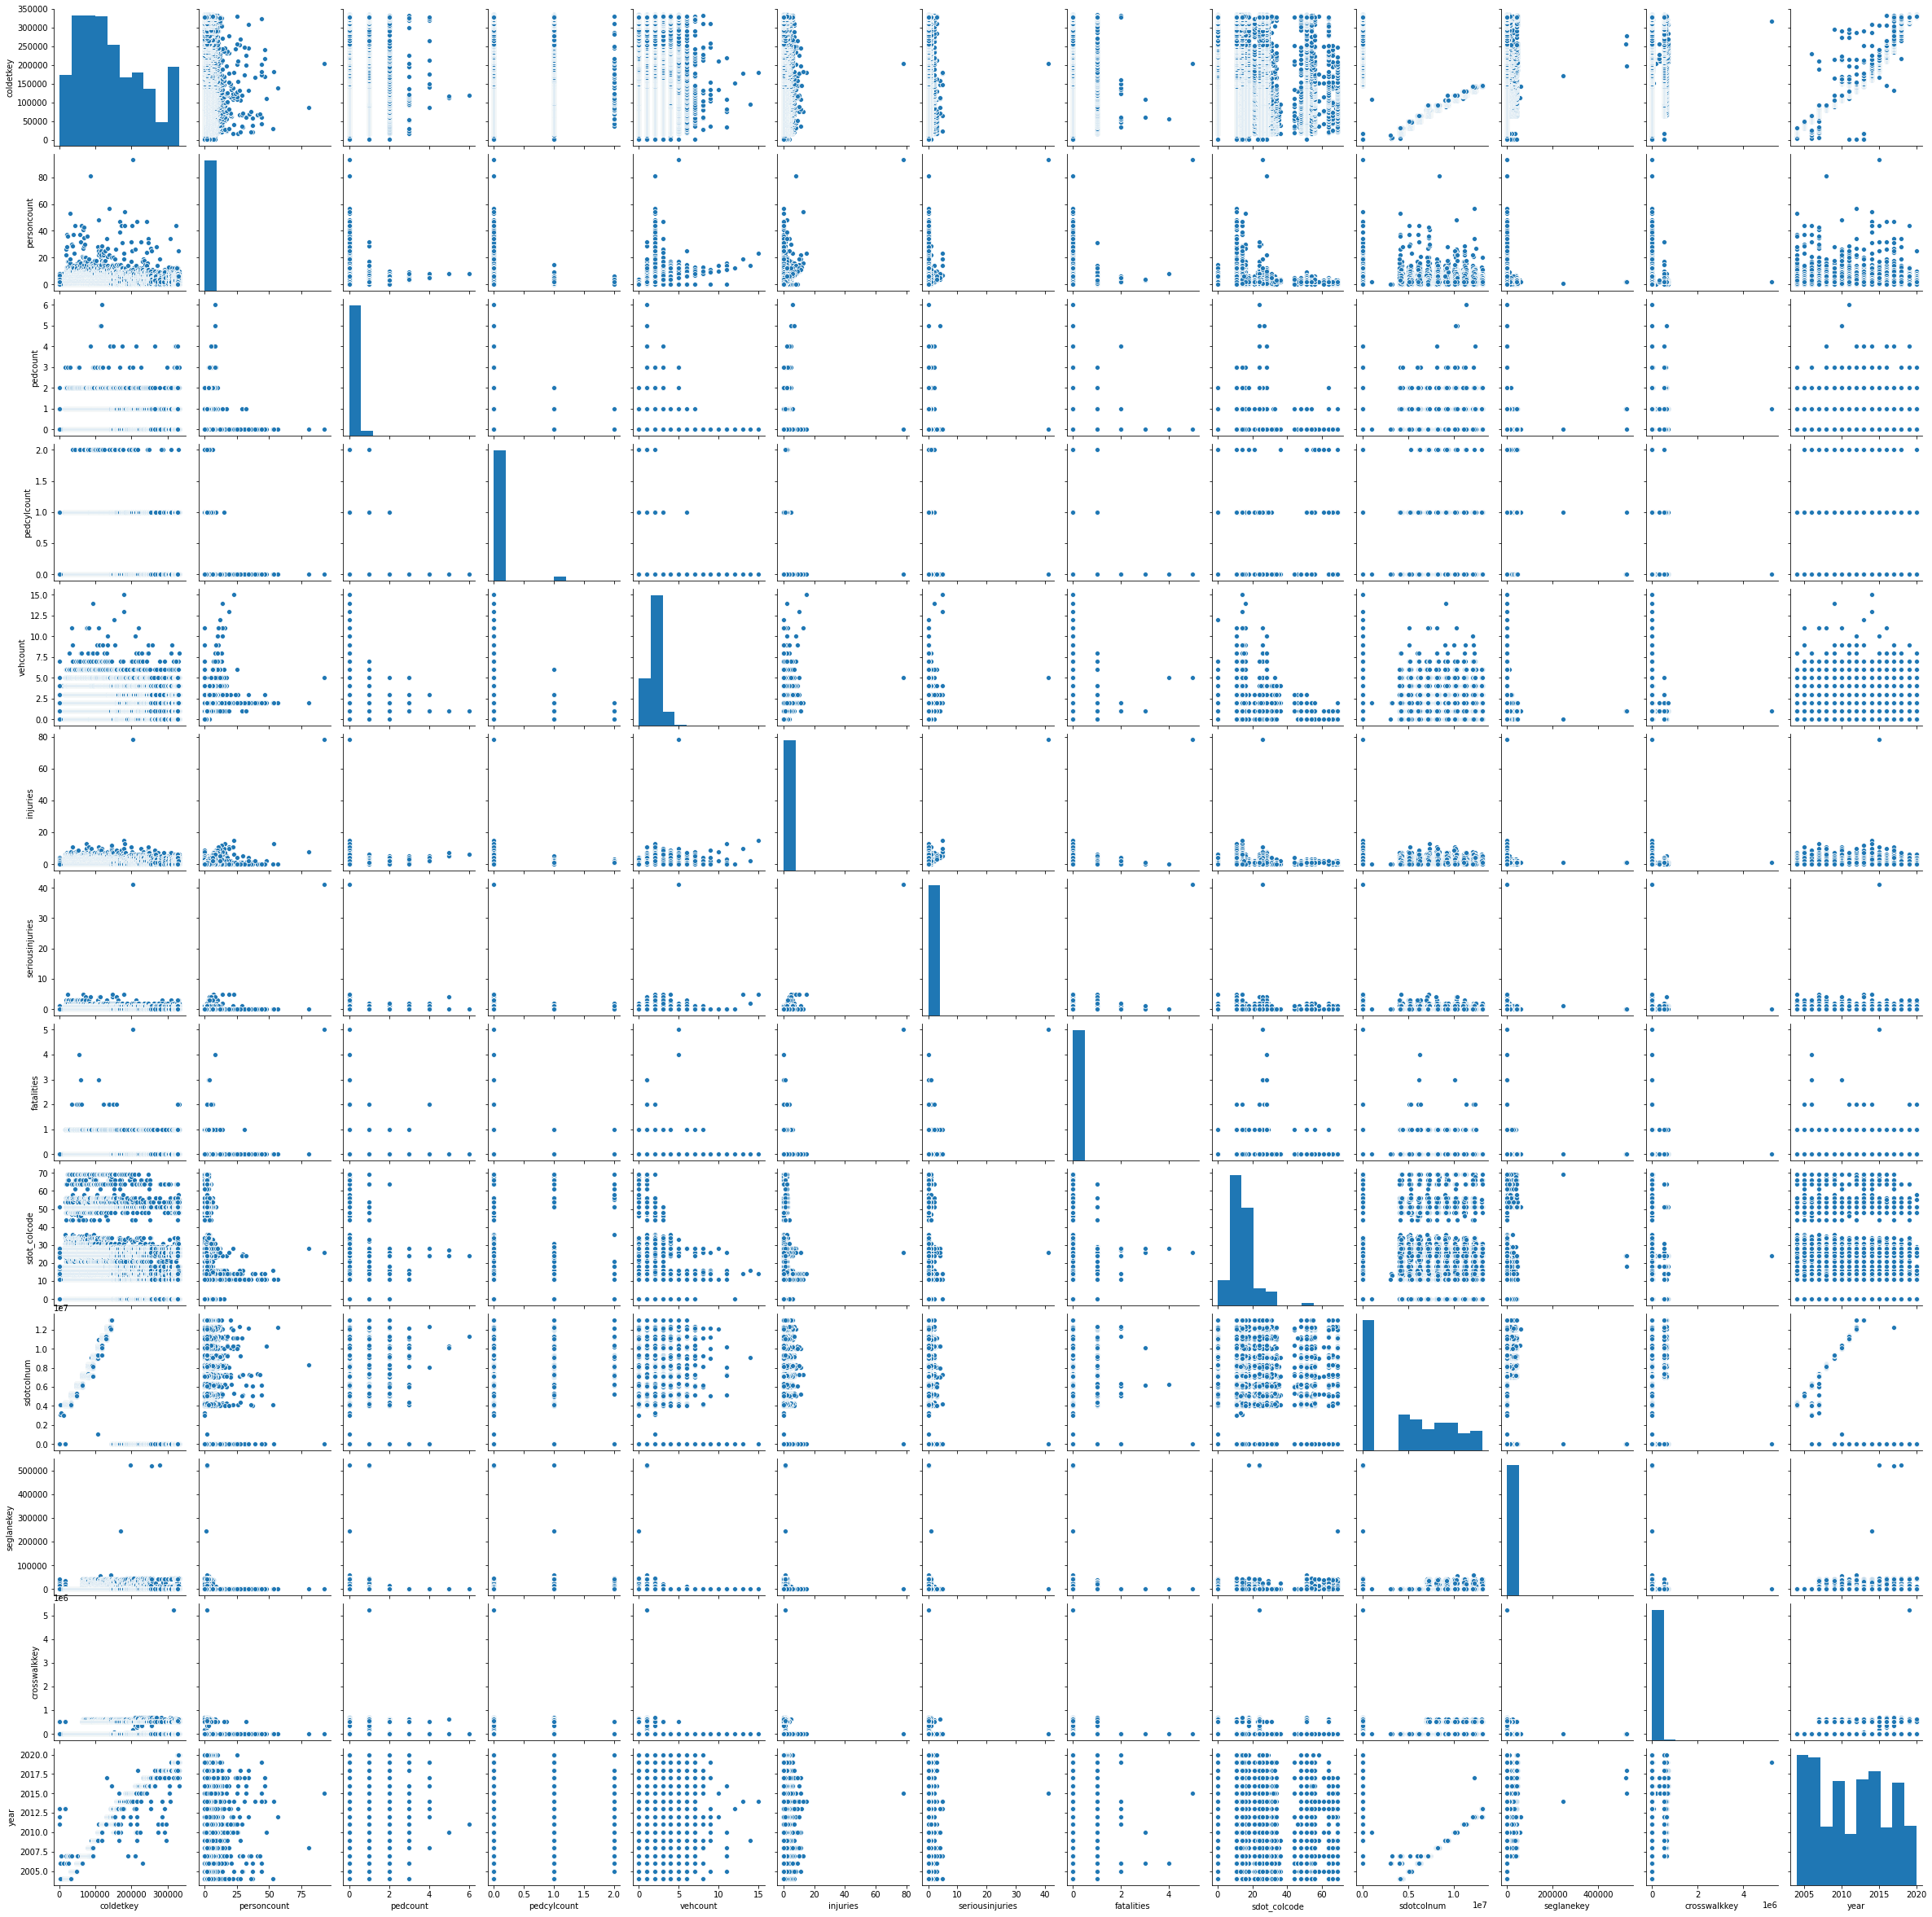

In [41]:
df_ = df.copy()
df_ = df_.select_dtypes(include=np.number)
df_.drop(columns=["x", "y", "objectid", "intkey", "inckey"], inplace=True)
len(list(df_.columns))

df_ = df_.fillna(0)
sns.pairplot(df_);

In [42]:
df.corr()

,x,y,objectid,inckey,coldetkey,intkey,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,sdot_colcode,sdotcolnum,seglanekey,crosswalkkey,year
x,1.000000,-0.156732,0.006366,0.005869,0.005866,0.118946,0.019277,0.012165,-0.001599,0.005752,0.014756,-0.005203,0.000297,0.018226,-0.004937,-0.000412,0.013877,0.005925
y,-0.156732,1.000000,-0.021358,-0.024321,-0.024337,-0.114120,-0.029736,0.008645,0.023368,-0.016146,0.001744,-0.002368,-0.004758,-0.025939,-0.007234,0.003654,0.007000,-0.023175
objectid,0.006366,-0.021358,1.000000,0.946587,0.946046,0.046578,-0.066026,0.021997,0.027860,-0.103409,-0.005603,-0.004358,-0.000192,-0.085278,0.970433,0.024395,0.052267,0.957918
inckey,0.005869,-0.024321,0.946587,1.000000,0.999996,0.048090,-0.066950,0.022255,0.024752,-0.115435,-0.005297,-0.004209,0.000358,-0.075080,0.990963,0.015850,0.044433,0.974894
coldetkey,0.005866,-0.024337,0.946046,0.999996,1.000000,0.048068,-0.066884,0.022255,0.024709,-0.115496,-0.005290,-0.004194,0.000369,-0.074904,0.990963,0.015736,0.044315,0.974444
intkey,0.118946,-0.114120,0.046578,0.048090,0.048068,1.000000,0.005025,-0.001166,-0.000091,-0.005772,0.012283,0.010433,0.013782,0.006935,0.031020,-0.009805,0.019931,0.049516
personcount,0.019277,-0.029736,-0.066026,-0.066950,-0.066884,0.005025,1.000000,0.011399,-0.009402,0.557677,0.319226,0.107679,0.046336,0.008462,0.010687,-0.008445,-0.010453,-0.066953
pedcount,0.012165,0.008645,0.021997,0.022255,0.022255,-0.001166,0.011399,1.000000,-0.015864,-0.154833,0.167339,0.132425,0.073106,0.260941,0.021195,0.001277,0.553907,0.021796
pedcylcount,-0.001599,0.023368,0.027860,0.024752,0.024709,-0.000091,-0.009402,-0.015864,1.000000,-0.151174,0.122379,0.061827,0.011083,0.369110,0.031468,0.456354,0.104197,0.027786
vehcount,0.005752,-0.016146,-0.103409,-0.115435,-0.115496,-0.005772,0.557677,-0.154833,-0.151174,1.000000,0.142612,-0.003009,-0.010764,-0.078749,-0.016652,-0.075934,-0.121621,-0.108412


In [43]:
df.corr()[df.corr() > .1]

,x,y,objectid,inckey,coldetkey,intkey,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,sdot_colcode,sdotcolnum,seglanekey,crosswalkkey,year
x,1.000000,NaN,NaN,NaN,NaN,0.118946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
objectid,NaN,NaN,1.000000,0.946587,0.946046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.970433,NaN,NaN,0.957918
inckey,NaN,NaN,0.946587,1.000000,0.999996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990963,NaN,NaN,0.974894
coldetkey,NaN,NaN,0.946046,0.999996,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990963,NaN,NaN,0.974444
intkey,0.118946,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personcount,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.557677,0.319226,0.107679,NaN,NaN,NaN,NaN,NaN,NaN
pedcount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.167339,0.132425,NaN,0.260941,NaN,NaN,0.553907,NaN
pedcylcount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.122379,NaN,NaN,0.369110,NaN,0.456354,0.104197,NaN
vehcount,NaN,NaN,NaN,NaN,NaN,NaN,0.557677,NaN,NaN,1.000000,0.142612,NaN,NaN,NaN,NaN,NaN,NaN,NaN


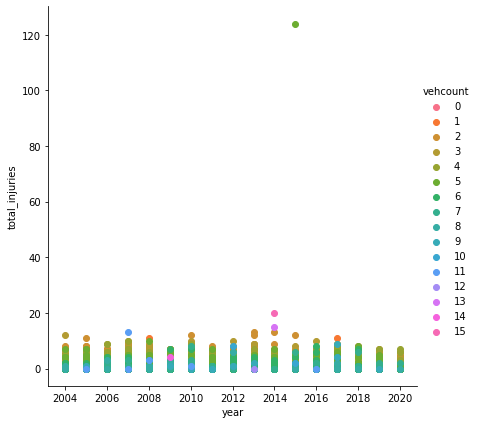

In [44]:
df_ = pd.DataFrame({"year": df["year"],
                    "vehcount": df["vehcount"],
                    "injuries": df["injuries"],
                    "seriousinjuries": df["seriousinjuries"],
                    "fatalities": df["fatalities"]}) #, dtypes = {"year" = int,
#                                                               "vehcount" = int,
#                                                                "injuries" = int})
for col in df_:
    df_[col] = df_[col].astype(int)

df_.dtypes

df_["total_injuries"] = df_["injuries"] + df_["seriousinjuries"] + df_["fatalities"]
df_.head()

sns.FacetGrid(df_, hue="vehcount", size=6) \
   .map(plt.scatter, "year", "total_injuries") \
   .add_legend();